TABLE OF CONTENT

  1. Importing libraries, data and select columns --> Long+Short-terms  &  Short-term  
  2. The elbow technique
  3. k-means clustering
    3.1 Price & Minimum Nights
    3.2 Price & Availability
    3.3 Price & Accommodates
    3.4 Price & Number of Reviews
    3.5 Min. Nights & Max. Nights
  4. Short-Term: k-means clustering
    4.1 Short-Term: Price & Minimum Nights
    4.2 Short-Term: Price & Availability
    4.3 Short-Term: Price & Accommodates
    4.4 Short-Term: Price & Number of Reviews
    4.5 Min. Nights & Max. Nights
      

# Importing libraries, data & select columns --> Long+Short  &  Short Term

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

import warnings
warnings.simplefilter("ignore")

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

### Import Long & Short Term

In [4]:
# Import 'final_selected' which contains only numerical variables
final_selected = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_selected.pkl'))
final_selected.reset_index(drop=True, inplace=True)
final_selected.index = range(1, len(final_selected) + 1)
final_selected.columns

Index(['id', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'accommodates',
       'maximum_nights', 'review_scores_rating', 'price_range',
       'accommodates_type', 'rental_simple_type', 'rental_type',
       'review_level', 'rating'],
      dtype='object')

In [5]:
# Create a subset with only the numerical columns
final_selected = final_selected[['id','price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'accommodates', 'maximum_nights', 'review_scores_rating']]
final_selected.columns

Index(['id', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'accommodates',
       'maximum_nights', 'review_scores_rating'],
      dtype='object')

In [6]:
final_selected.shape

(60730, 9)

In [7]:
final_selected.head()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating
1,22438,53.0,93,182,1,349,2,365,4.7
2,22438,53.0,93,182,1,349,2,365,4.7
3,22438,53.0,93,182,1,349,2,365,4.7
4,22438,53.0,93,182,1,349,2,365,4.7
5,22438,53.0,93,182,1,349,2,365,4.7


In [8]:
final_selected.dtypes

id                                 object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
accommodates                        int64
maximum_nights                      int64
review_scores_rating              float64
dtype: object

### Import Short Term

In [9]:
# Import 'short_term' which contains only numerical variables
short_term = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'short_term_3.pkl'))
short_term.reset_index(drop=True, inplace=True)
short_term.index = range(1, len(short_term) + 1)
short_term.columns

Index(['id', 'date', 'month', 'available', 'season', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'license', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'maximum_nights', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'Population',
       'Deficit housing', 'rental_simple_type', 'price_range',
       'accommodates_type', 'rental_type', 'review_level'],
      dtype='object')

In [10]:
# Create a subset with only the numerical columns
short_term = short_term[['id','price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'accommodates', 'maximum_nights', 'review_scores_rating']]
short_term.shape

(41018, 9)

In [11]:
short_term.head()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating
1,22677,143.0,2,469,1,142,6,30,4.8
2,22677,143.0,2,469,1,142,6,30,4.8
3,22677,143.0,2,469,1,142,6,30,4.8
4,22677,143.0,2,469,1,142,6,30,4.8
5,22677,143.0,2,469,1,142,6,30,4.8


In [12]:
short_term.dtypes

id                                 object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
accommodates                        int64
maximum_nights                      int64
review_scores_rating              float64
dtype: object

# 2. The elbow technique

### Long & Short Term

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(final_selected).score(final_selected) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-578619213088213.6,
 -157982750087482.7,
 -67909021698444.99,
 -26638476795970.336,
 -17826588696140.242,
 -13423951297606.387,
 -9849337185342.86,
 -7107224844056.657,
 -5845062212304.41]

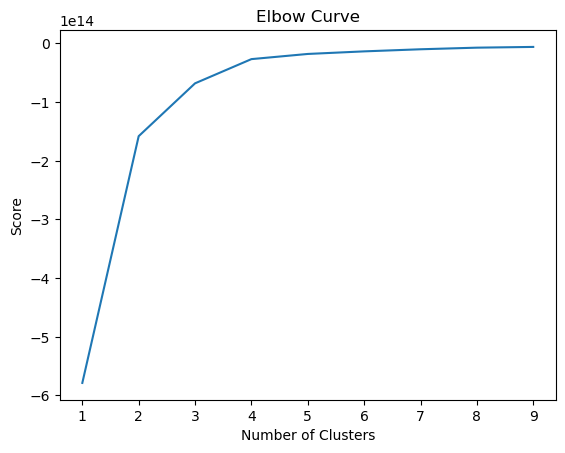

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is 4.

### Short Term

In [16]:
num_cl_ST = range(1, 10) # Defines the range of potential clusters in the data.
kmeans_ST = [KMeans(n_clusters=i) for i in num_cl_ST] # Defines k-means clusters in the range assigned above.

In [17]:
score_ST = [kmeans_ST[i].fit(short_term).score(short_term) for i in range(len(kmeans_ST))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score_ST

[-322135778839339.75,
 -90172396577639.22,
 -41543906578027.05,
 -15392468416520.367,
 -11650559925306.844,
 -8334117651241.125,
 -5889045670563.643,
 -4459325271083.697,
 -3635693085328.717]

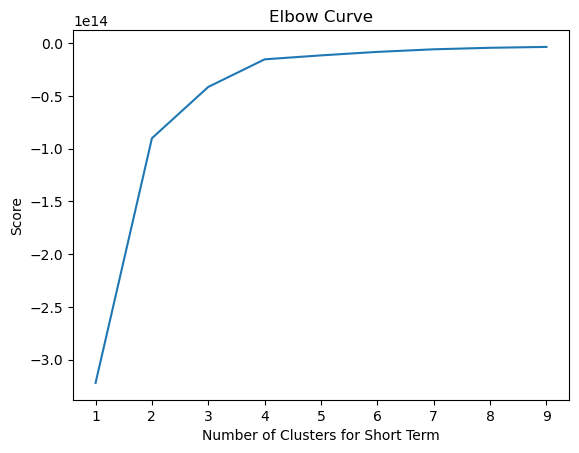

In [18]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl_ST,score_ST)
pl.xlabel('Number of Clusters for Short Term')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is 4.

# 3. k-means clustering

In [19]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [20]:
# Fit the k-means object to the data.
kmeans.fit(final_selected)

KMeans(n_clusters=4)

In [21]:
final_selected['clusters'] = kmeans.fit_predict(final_selected)
final_selected.head()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating,clusters
1,22438,53.0,93,182,1,349,2,365,4.7,0
2,22438,53.0,93,182,1,349,2,365,4.7,0
3,22438,53.0,93,182,1,349,2,365,4.7,0
4,22438,53.0,93,182,1,349,2,365,4.7,0
5,22438,53.0,93,182,1,349,2,365,4.7,0


In [22]:
final_selected['clusters'].value_counts()

clusters
1    21471
3    14784
0    13728
2    10747
Name: count, dtype: int64

In [23]:
final_selected.loc[final_selected['clusters'] == 2, 'cluster'] = '1'
final_selected.loc[final_selected['clusters'] == 1, 'cluster'] = '2'
final_selected.loc[final_selected['clusters'] == 0, 'cluster'] = '3'
final_selected.loc[final_selected['clusters'] == 3, 'cluster'] = '4'

In [24]:
final_selected.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'calculated_host_listings_count':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'accommodates':['mean', 'median'], 
                         'maximum_nights':['mean', 'median'],
                         'review_scores_rating':['mean', 'median']})

price        minimum_nights        number_of_reviews         \
               mean median           mean median              mean median   
cluster                                                                     
1         85.761487   68.0      23.861822    3.0        217.748209  231.0   
2         93.411830   91.0      22.099157    3.0        139.299241   87.0   
3        119.386175   93.0      50.282051    6.0        124.205128   81.0   
4        108.788610  100.0      74.142857    5.0        126.714286   59.0   

        calculated_host_listings_count        availability_365         \
                                  mean median             mean median   
cluster                                                                 
1                             2.687820    1.0       204.446264  218.0   
2                             3.262400    2.0       167.091239  185.0   
3                             1.846154    1.0       133.282051  109.0   
4                             1.952381    1.0       126.690476   74.5   

        accommodates        maximum_nights        review_scores_rating         
                mean median           mean median                 mean median  
cluster                                                                        
1           2.919140    2.0     453.622313  200.0             4.553930  4.780  
2           3.557356    4.0     471.184481  365.0             4.643756  4.720  
3           3.820513    3.0     354.128205  200.0             4.755897  4.750  
4           3.285714    3.0     355.452381  365.0             4.700476  4.715

## 3.1 Price & Minimum Nights

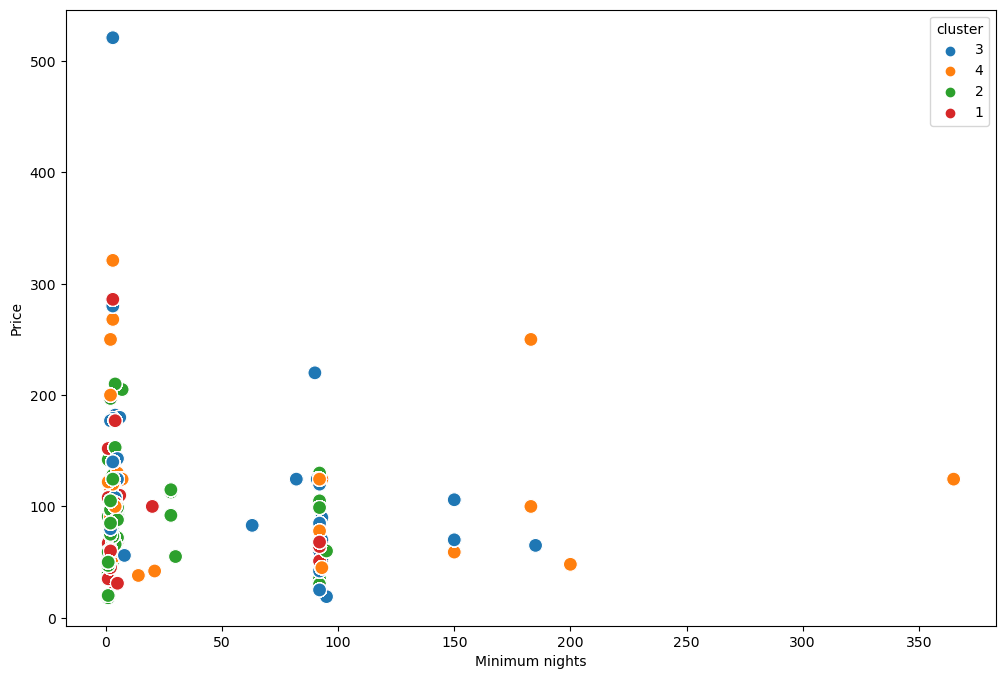

In [25]:
# Plot the clusters for the "Price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=final_selected['minimum_nights'], y=final_selected['price'], hue=final_selected['cluster'], s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum nights') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

While there was no visible linear connection between these variables, the clusters may shed light on some trends in the data that weren’t visible before. For example, there is a density of points in the min. nights 0 and 100. However, the price-density for a min. nights close to 0, give us a larger price range than those around 100 min. nights. The clusters 1 and 2 shows higher prices than the rest. The cluster 4, show us the lowest min. nights and also the lowest price (with the 3 cluster).

## 3.2 Price & Availability

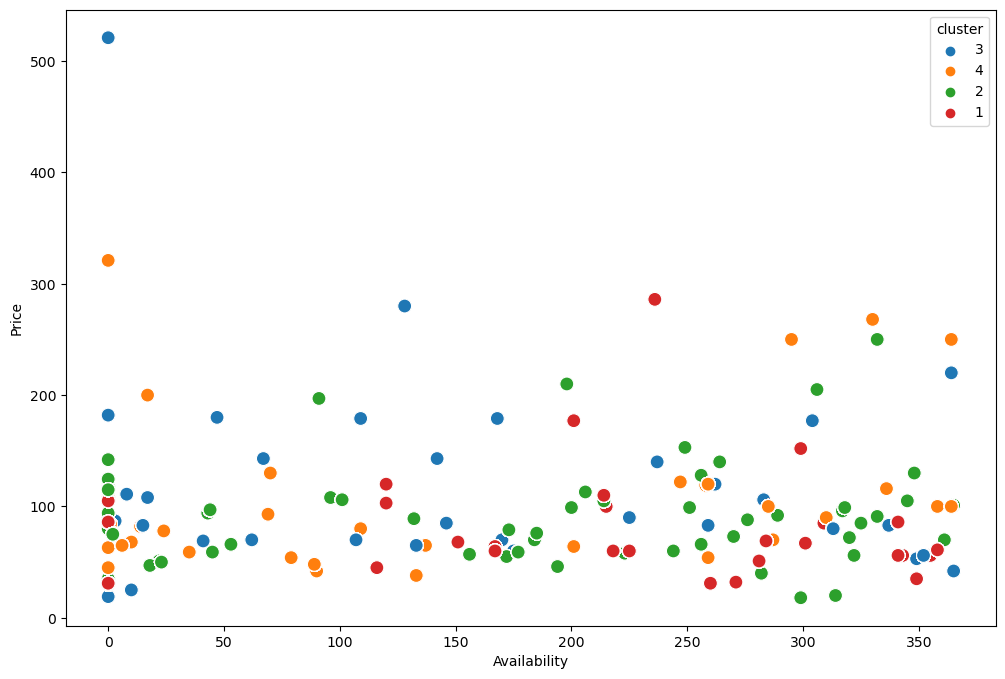

In [26]:
# Plot the clusters for the "Price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=final_selected['availability_365'], y=final_selected['price'], hue=final_selected['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

We see a high point-density in the low-availability - low-price for all the clusters. The cluster 2 indicates the highest price.

## 3.3 Price & Accommodates

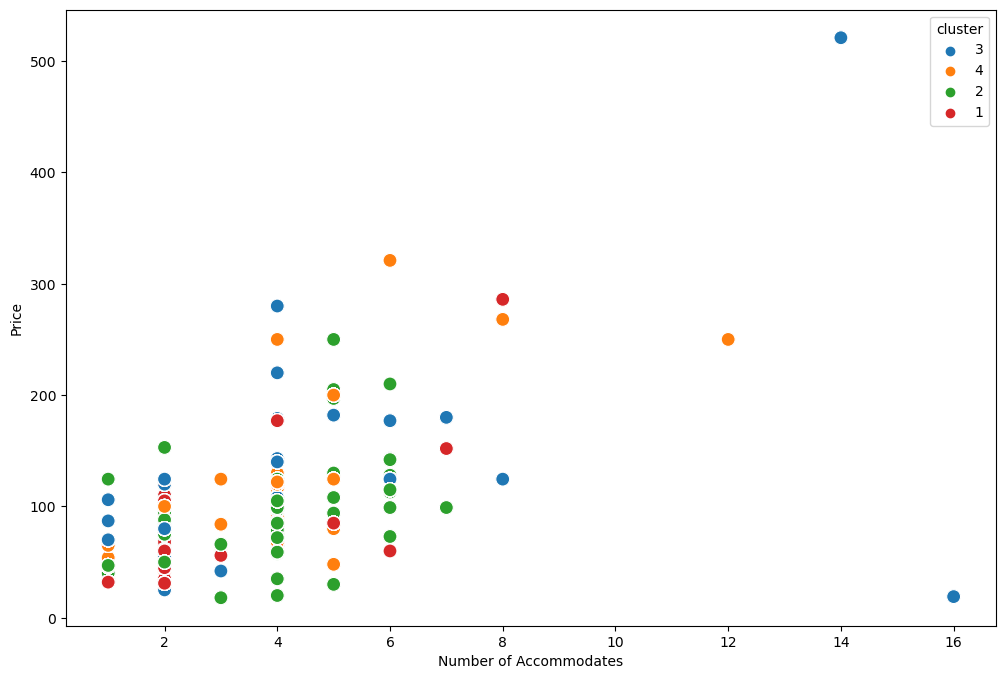

In [27]:
# Plot the clusters for the "Price" and "accommodates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=final_selected['accommodates'], y=final_selected['price'], hue=final_selected['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

The cluster 2 shows us the highest price and number of accommodates. There is a density point for prices lower than 150€ and accommodates 2 and 4. The cluster 4 presents high variability. While the cluster 1 shows the lowest prices.

## 3.4 Price & Number of Reviews

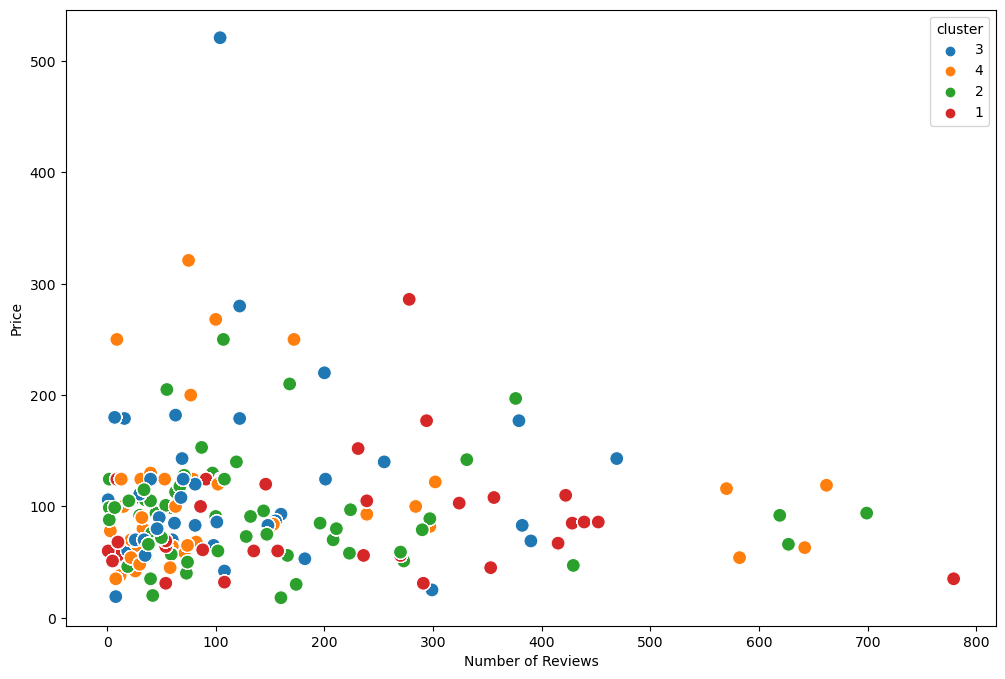

In [28]:
# Plot the clusters for the "Price" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=final_selected['number_of_reviews'], y=final_selected['price'], hue=final_selected['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

High density for number of reviews and prices < 100. 

## 3.5 Min. Nights & Max. Nights

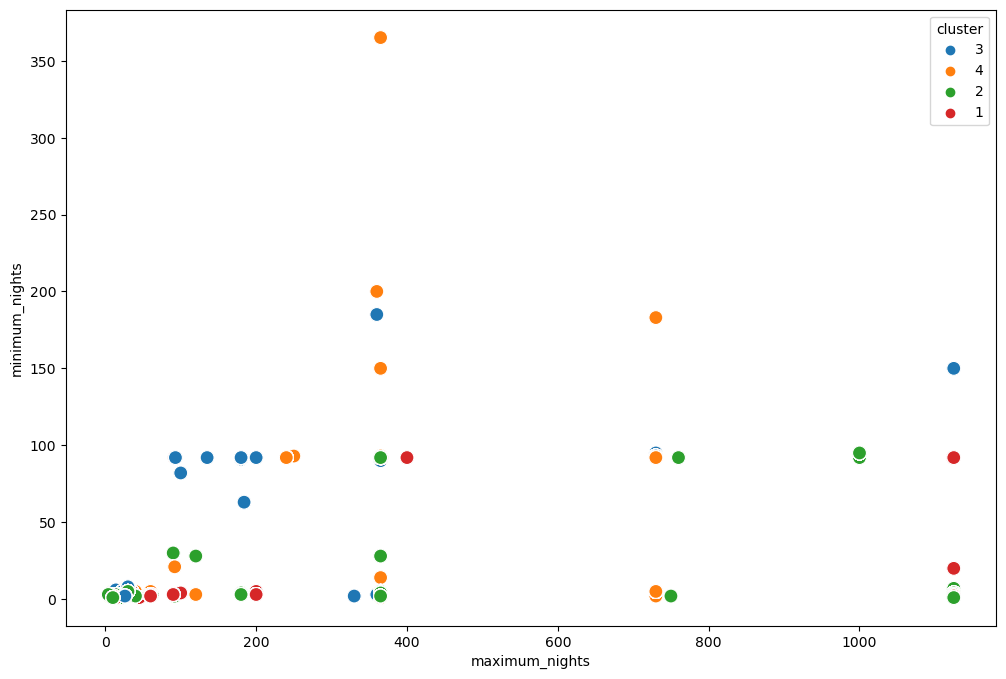

In [29]:
# Plot the clusters for the "max. nights" and "min. nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=final_selected['maximum_nights'], y=final_selected['minimum_nights'], hue=final_selected['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('maximum_nights') # Label x-axis.
plt.ylabel('minimum_nights') # Label y-axis.
plt.show()

# 4. Short-Term: k-means clustering

In [30]:
# Create the k-means object.
kmeans_ST = KMeans(n_clusters = 4) 

In [31]:
# Fit the k-means object to the data.
kmeans_ST.fit(short_term)

KMeans(n_clusters=4)

In [32]:
short_term['clusters'] = kmeans_ST.fit_predict(short_term)
short_term.head()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating,clusters
1,22677,143.0,2,469,1,142,6,30,4.8,1
2,22677,143.0,2,469,1,142,6,30,4.8,1
3,22677,143.0,2,469,1,142,6,30,4.8,1
4,22677,143.0,2,469,1,142,6,30,4.8,1
5,22677,143.0,2,469,1,142,6,30,4.8,1


In [33]:
short_term['clusters'].value_counts()

clusters
0    16543
3     8448
2     8283
1     7744
Name: count, dtype: int64

In [34]:
short_term.loc[short_term['clusters'] == 2, 'cluster'] = '1'
short_term.loc[short_term['clusters'] == 1, 'cluster'] = '2'
short_term.loc[short_term['clusters'] == 0, 'cluster'] = '3'
short_term.loc[short_term['clusters'] == 3, 'cluster'] = '4'

In [35]:
short_term.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'calculated_host_listings_count':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'accommodates':['mean', 'median'], 
                         'maximum_nights':['mean', 'median'],
                         'review_scores_rating':['mean', 'median']})

price             minimum_nights        number_of_reviews  \
               mean      median           mean median              mean   
cluster                                                                   
1         89.046481   69.000000       3.592297    3.0        273.003984   
2        145.205237  117.757601       3.454545    3.0        142.090909   
3         98.129886   91.000000       5.063834    3.0        159.049145   
4        115.813133  100.000000       4.416667    3.0        191.291667   

               calculated_host_listings_count        availability_365         \
        median                           mean median             mean median   
cluster                                                                        
1        270.0                       3.189907    2.0       219.197875  236.0   
2         91.0                       1.863636    1.0       129.181818   88.0   
3        101.0                       3.255455    2.0       156.287977  173.0   
4         88.5                       1.833333    1.0       161.625000  167.0   

        accommodates        maximum_nights        review_scores_rating         
                mean median           mean median                 mean median  
cluster                                                                        
1           3.192563    2.0     425.547145  100.0             4.714887  4.770  
2           4.136364    4.0     226.772727   47.5             4.802273  4.835  
3           3.531887    4.0     386.532189  365.0             4.647002  4.720  
4           3.541667    3.0     302.833333  242.5             4.715000  4.735

## 4.1 Price & Minimum Nights

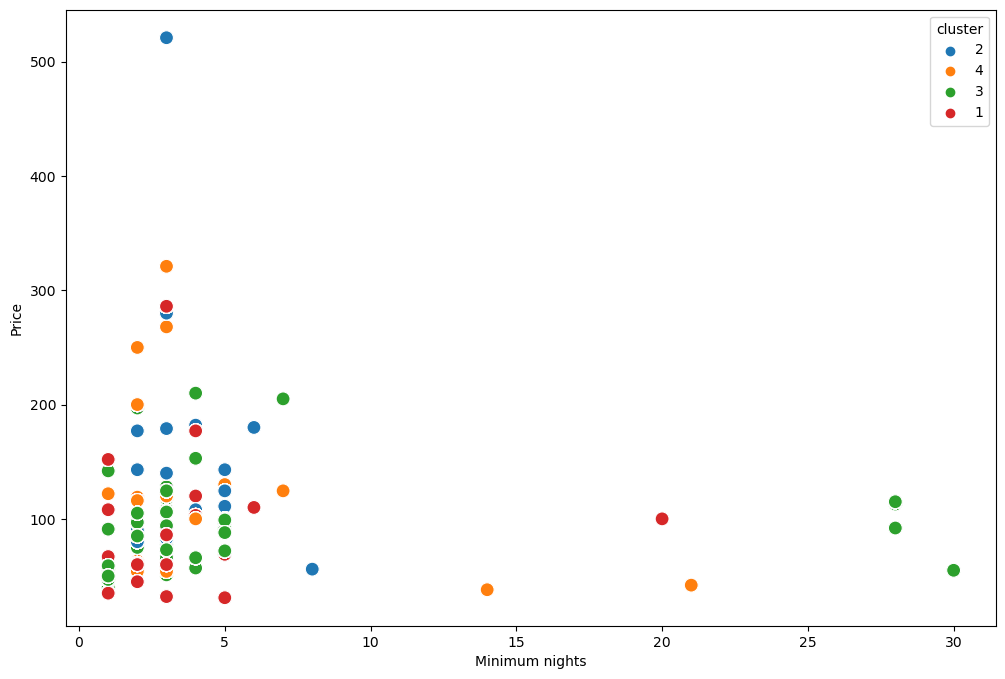

In [36]:
# Plot the clusters for the "Price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=short_term['minimum_nights'], y=short_term['price'], hue=short_term['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum nights') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

## 4.2 Price & Availability

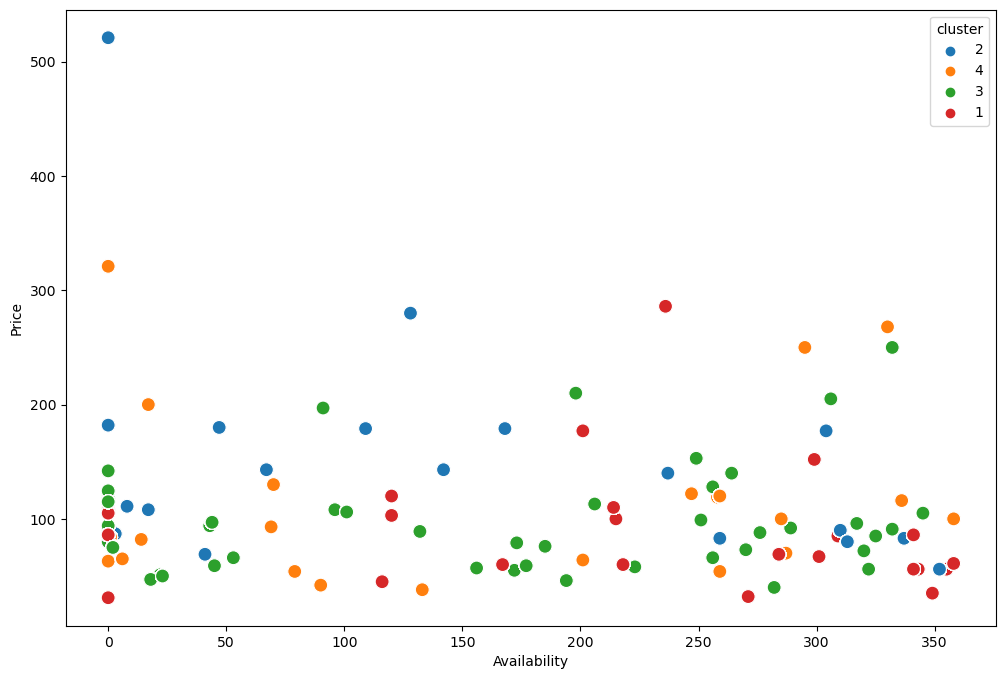

In [37]:
# Plot the clusters for the "Price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=short_term['availability_365'], y=short_term['price'], hue=short_term['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

## 4.3 Price & Accommodates

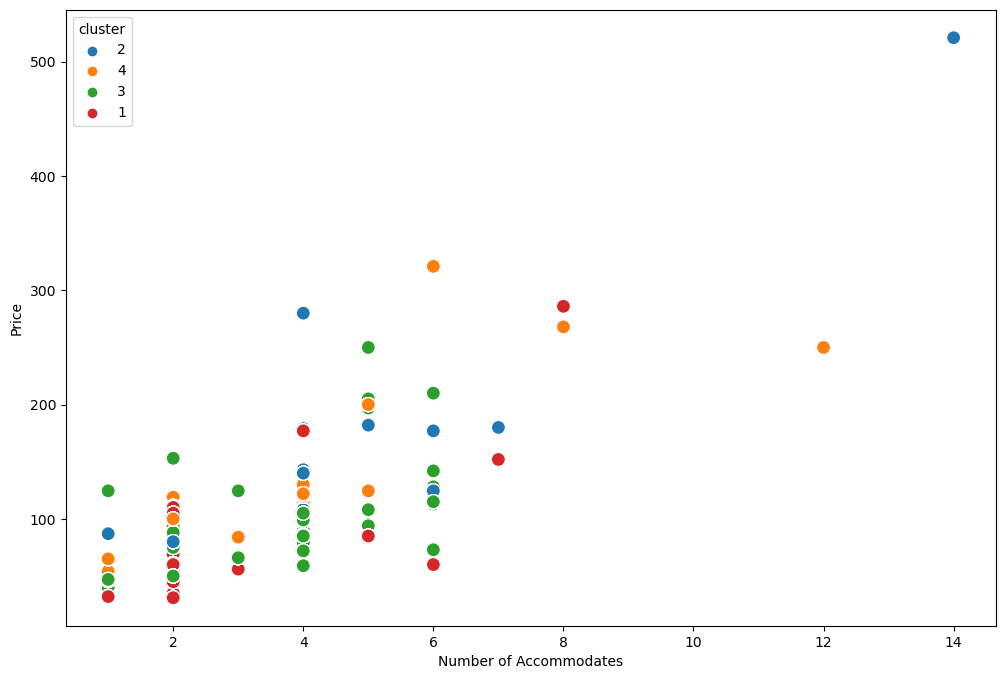

In [38]:
# Plot the clusters for the "Price" and "accommodates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=short_term['accommodates'], y=short_term['price'], hue=short_term['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

## 4.4 Price & Number of Reviews

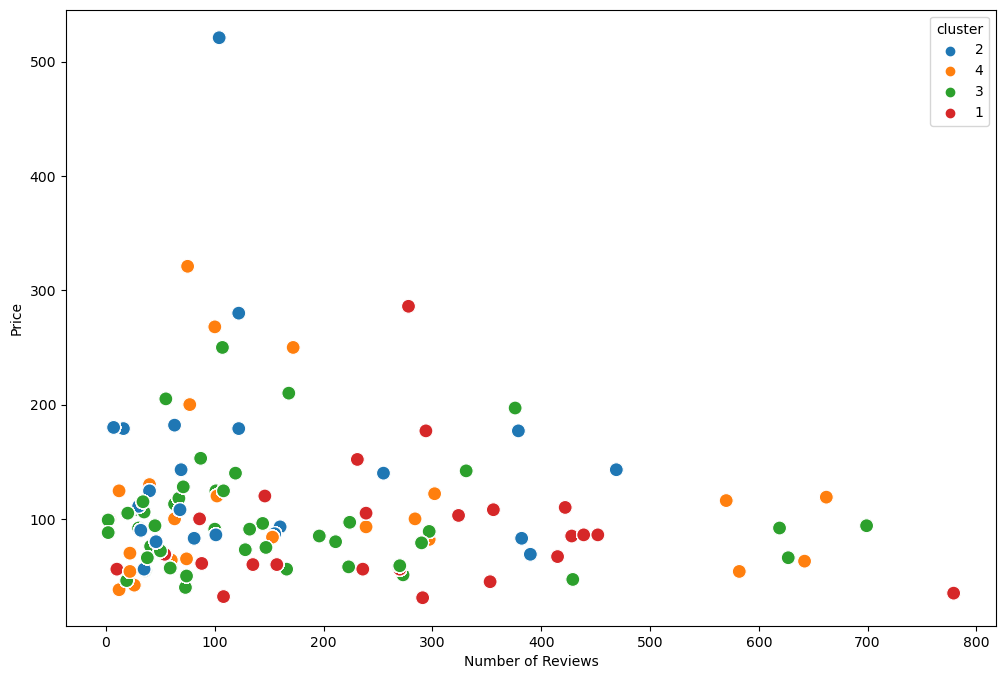

In [39]:
# Plot the clusters for the "Price" and "number of reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=short_term['number_of_reviews'], y=short_term['price'], hue=short_term['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

## 4.5 Min. Nights & Max. Nights

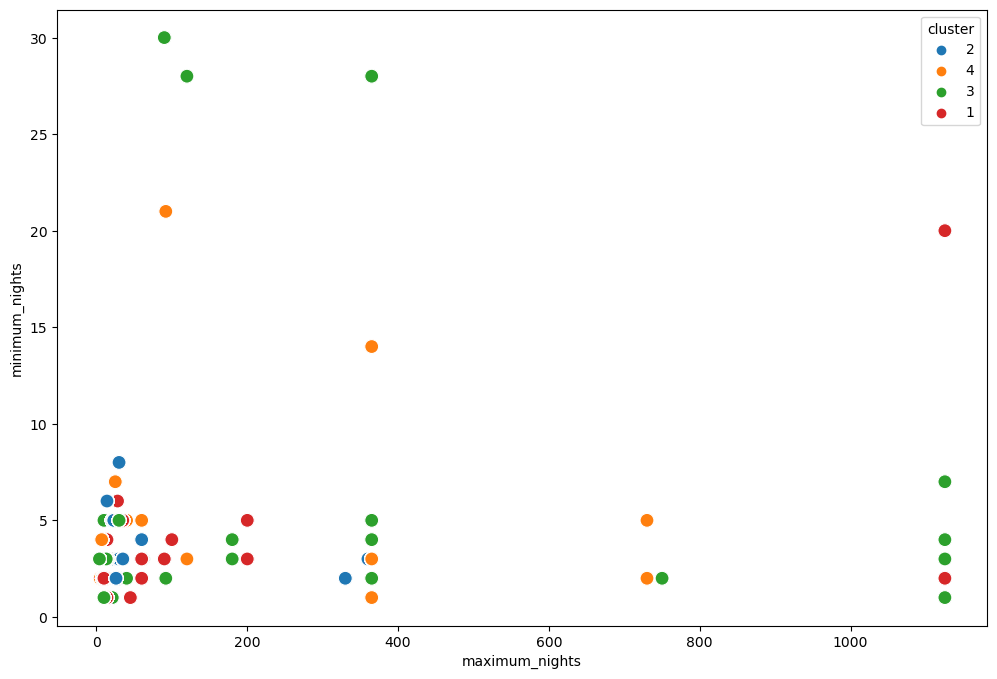

In [40]:
# Plot the clusters for the "min. nights" and "max. nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=short_term['maximum_nights'], y=short_term['minimum_nights'], hue=short_term['cluster'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('maximum_nights') # Label x-axis.
plt.ylabel('minimum_nights') # Label y-axis.
plt.show()